### Task 3.2
* Name:LI WAN
* Student Number:223718804
* E-mail:s223718804@deakin.edu.au
* Course:SIT720
---

In [99]:
# Q1 Load data 
import pandas as pd
local_path = r'E:\2-学习\1-Deakin\24-T1\SIT720\Task\FluoridationData.csv'
df=pd.read_csv(local_path, comment='#')
df.shape

(1059, 10)

In [100]:
df

,_id,cartodb_id,melbourne,postcode,id,fluoride_level,water_company,townsuburb,lat,lon
0,1,236,False,3227,236,Fluoridated,Barwon Water,CONNEWARRE,-38.264069,144.462309
1,2,1,True,3067,1,Fluoridated,City West Water,ABBOTSFORD,-37.803000,145.002000
2,3,2,True,3040,2,Fluoridated,City West Water,ABERFELDIE,-37.762000,144.901000
3,4,3,False,3352,3,Not fluoridated,Central Highlands Water,ADDINGTON,-37.383333,143.683333
4,5,4,False,3465,4,Fluoridated,Central Highlands Water,ADELAIDE LEAD,-37.083821,143.679125
...,...,...,...,...,...,...,...,...,...,...
1054,1055,1055,False,3352,1055,Fluoridated,Central Highlands Water,YENDON,-37.644585,143.965034
1055,1056,1056,True,3770,1056,Fluoridated,Yarra Valley Water,YERING,-37.700221,145.358251
1056,1057,1057,False,3869,1057,Fluoridated,Gippsland Water,YINNAR,-38.316667,146.316667
1057,1058,1058,True,3063,1058,Fluoridated,Yarra Valley Water,YUROKE,-37.600000,144.880000


In [101]:
# Q2 Display the data type of all features and print median values for float features
for column in df.columns:
    dtype = df[column].dtype
    print(f"Data type of '{column}': {dtype}")
    if dtype == 'float64':
        median_value = df[column].median()
        print(f"Median value of '{column}': {median_value}")

Data type of '_id': int64
Data type of 'cartodb_id': int64
Data type of 'melbourne': bool
Data type of 'postcode': int64
Data type of 'id': int64
Data type of 'fluoride_level': object
Data type of 'water_company': object
Data type of 'townsuburb': object
Data type of 'lat': float64
Median value of 'lat': -37.788
Data type of 'lon': float64
Median value of 'lon': 144.989


In [102]:
# Q3 Print all the possible values of the feature “fluoride_level” and calculate the ratio of each “fluoride_level” value.
# Count occurrences of each value in the "fluoride_level" column
fluoride_counts = df['fluoride_level'].value_counts()

# Print all possible values of the feature "fluoride_level"
print("All possible values of 'fluoride_level':")
print(fluoride_counts.index.tolist())

# Calculate the ratio of each "fluoride_level" value
total_samples = len(df)
print("\nRatio of each 'fluoride_level' value:")
for value, count in fluoride_counts.items():
    ratio = count / total_samples
    print(f"{value}: {ratio:.4f}")

All possible values of 'fluoride_level':
['Fluoridated', 'Not fluoridated', 'Partly fluoridated', 'Natural fluoride']

Ratio of each 'fluoride_level' value:
Fluoridated: 0.7432
Not fluoridated: 0.2417
Partly fluoridated: 0.0132
Natural fluoride: 0.0019


In [103]:
# Q4 Is there any association between “melbourne” and “fluoride_level”?
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['melbourne'], df['fluoride_level'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)
# Compare with significance level (0.05)
if p < 0.05:
    print("There is significant evidence of association between 'melbourne' and 'fluoride_level'.")
else:
    print("There is no significant evidence of association between 'melbourne' and 'fluoride_level'.")

Chi-square statistic: 164.56534953232273
P-value: 1.8958896190626055e-35
There is significant evidence of association between 'melbourne' and 'fluoride_level'.


In [104]:
# Q5 Print the number of water companies for different suburbs.
# Group by 'townsuburb' and count the values in 'water_company'
water_companies_per_suburb = df.groupby('townsuburb')['water_company'].size()

# Sort the result in descending order
water_companies_per_suburb_sorted = water_companies_per_suburb.sort_values(ascending=False)

# Print the result
print(water_companies_per_suburb_sorted)

townsuburb
BELGRAVE       2
MULGRAVE       2
HUNTINGDALE    2
MELBOURNE      2
COBURG         2
              ..
FYANSFORD      1
GARDENVALE     1
GARFIELD       1
GEELONG        1
YUROKE         1
Name: water_company, Length: 1046, dtype: int64


In [105]:
# Q6 Which suburb has the biggest number of water companies?
# Find the suburb with the highest number of water companies
suburb_with_most_water_companies = water_companies_per_suburb_sorted[water_companies_per_suburb_sorted == 2]

# Print the suburb with the most water companies
print("Suburb with the most water companies:", suburb_with_most_water_companies)

Suburb with the most water companies: townsuburb
BELGRAVE       2
MULGRAVE       2
HUNTINGDALE    2
MELBOURNE      2
COBURG         2
ARMADALE       2
OAKLEIGH       2
HUGHESDALE     2
TULLAMARINE    2
UPWEY          2
MALVERN        2
PAKENHAM       2
BAYSWATER      2
Name: water_company, dtype: int64


In [106]:
# Q7 Which suburb has the biggest number of fluoridated companies?
# Filter the DataFrame for rows where "fluoride_level" is "Fluoridated"
fluoridated_df = df[df['fluoride_level'] == 'Fluoridated']

# Group the filtered DataFrame by suburb and count the number of water companies
fluoridated_companies_per_suburb = fluoridated_df.groupby('townsuburb')['water_company'].size()

# Find the maximum count of fluoridated companies
max_count = fluoridated_companies_per_suburb.max()

# Find all suburbs with the maximum count of fluoridated companies
max_suburbs = fluoridated_companies_per_suburb[fluoridated_companies_per_suburb == max_count].index.tolist()

# Print all suburbs with the maximum count of fluoridated companies
print("Suburbs with the most fluoridated companies (", max_count, "companies):", max_suburbs)


Suburbs with the most fluoridated companies ( 2 companies): ['ARMADALE', 'BAYSWATER', 'BELGRAVE', 'COBURG', 'HUGHESDALE', 'HUNTINGDALE', 'MALVERN', 'MELBOURNE', 'MULGRAVE', 'OAKLEIGH', 'PAKENHAM', 'TULLAMARINE', 'UPWEY']


In [107]:
# Q8 Create and print a data frame of the number of water companies at different fluoride levels for different suburbs.
# Group the DataFrame by suburb and fluoride level, then count the number of water companies
water_companies_per_suburb_fluoride = df.groupby(['townsuburb', 'fluoride_level'])['water_company'].size().reset_index()

# Pivot the table to get fluoride levels as columns and suburbs as rows
water_companies_pivot = water_companies_per_suburb_fluoride.pivot_table(index='townsuburb', columns='fluoride_level', values='water_company', fill_value=0)

# Print the DataFrame
water_companies_pivot

fluoride_level,Fluoridated,Natural fluoride,Not fluoridated,Partly fluoridated
townsuburb,,,,
ABBOTSFORD,1,0,0,0
ABERFELDIE,1,0,0,0
ADDINGTON,0,0,1,0
ADELAIDE LEAD,1,0,0,0
AGNES,0,0,1,0
...,...,...,...,...
YELLINGBO,0,0,0,1
YENDON,1,0,0,0
YERING,1,0,0,0


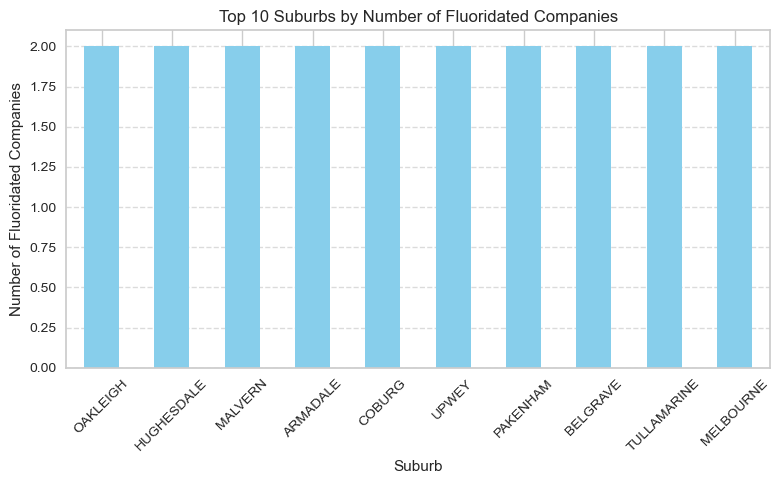

In [108]:
# Q9 Draw a histogram of the top 10 suburbs against its number of fluoridated companies.
import matplotlib.pyplot as plt

# Sort the results in descending order and select the top 10 suburbs
top_10_suburbs = fluoridated_companies_per_suburb.sort_values(ascending=False).head(10)

# Plot a histogram of the number of fluoridated companies for the top 10 suburbs
plt.figure(figsize=(8, 5))
top_10_suburbs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Suburbs by Number of Fluoridated Companies')
plt.xlabel('Suburb')
plt.ylabel('Number of Fluoridated Companies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [109]:
# Q10 Based on the original dataset，use the available features and perform clustering on all the water companies and determine the number of clusters. Is this the same as the number of suburbs in the data set?
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Select the desired features from the original dataset
selected_features = ['melbourne', 'postcode', 'fluoride_level', 'townsuburb', 'lat', 'lon','water_company']
data = df[selected_features]

# Data preprocessing: Standardize numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['lat', 'lon']])

# Replace the original latitude and longitude features with the standardized ones
data[['lat', 'lon']] = scaled_data

# Creating an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encoding the 'fluoride_level' feature
data['fluoride_level'] = label_encoder.fit_transform(data['fluoride_level'])


# Encoding the 'townsuburb' feature
data['townsuburb'] = label_encoder.fit_transform(data['townsuburb'])

C:\Users\Maxmelon\AppData\Local\Temp\ipykernel_10552\989231363.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['lat', 'lon']] = scaled_data
C:\Users\Maxmelon\AppData\Local\Temp\ipykernel_10552\989231363.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fluoride_level'] = label_encoder.fit_transform(data['fluoride_level'])
C:\Users\Maxmelon\AppData\Local\Temp\ipykernel_10552\989231363.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

C:\Users\Maxmelon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Maxmelon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Maxmelon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Maxmelon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory le

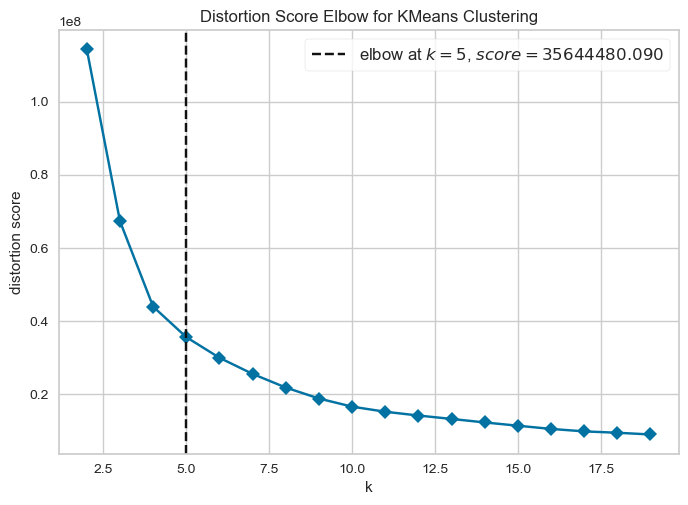

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [110]:
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

X=data.iloc[:,0:-1]
y=data.iloc[:,-1]

# Instantiate the clustering model and visualizer
model = KMeans(n_init=10) 
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='distortion', timings=False
) #distortion same as Euclidean distance

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

In [111]:
townsuburb_counts = df['townsuburb'].value_counts()
print("Number of unique townsuburb names:", len(townsuburb_counts))
print(townsuburb_counts)

Number of unique townsuburb names: 1046
townsuburb
BAYSWATER      2
OAKLEIGH       2
UPWEY          2
TULLAMARINE    2
ARMADALE       2
              ..
FRYERSTOWN     1
FYANSFORD      1
GARDENVALE     1
GARFIELD       1
NHILL          1
Name: count, Length: 1046, dtype: int64


The number of clusters does not necessarily have to be the same as the number of suburbs in the dataset. Clustering is an unsupervised learning technique used to group similar data points together based on certain features or characteristics. The number of clusters is typically determined by the algorithm or by the analyst based on the underlying structure of the data, while the number of suburbs represents the distinct geographical regions or areas in the dataset. These two quantities may or may not align depending on the nature of the data and the clustering algorithm used.

In [112]:
# Q11 Choose the best K and perform K-Means on the data set, report the purity score.
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import numpy as np

# Choose the best K (e.g., by visually inspecting the elbow curve)
optimal_k = 5  # You can select the K value based on the elbow method

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=optimal_k, n_init=10)

# Fit the KMeans model and predict cluster labels
labels_kmeans = kmeans.fit_predict(X)

# Function to calculate purity score
def calculate_purity(labels, y):
    contingency = contingency_matrix(y, labels)
    return np.sum(np.amax(contingency, axis=0)) / np.sum(contingency)

# Calculate purity score
purity_kmeans = calculate_purity(labels_kmeans, y)

# Report the results
print("Evaluation Metrics for K-means:")
print(f"Purity: {purity_kmeans}")

C:\Users\Maxmelon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Evaluation Metrics for K-means:
Purity: 0.2096317280453258


In [113]:
# Q12 Perform K-Means++ on the data set, report the purity score and explain whether the K-Means++ returns better/worse result than that of K-Means.
# Instantiate the KMeans model with K-Means++ initialization
kmeans_pp = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10)

# Fit the KMeans model and predict cluster labels
labels_kmeans_pp = kmeans_pp.fit_predict(X)

# Function to calculate purity score
def calculate_purity(labels, y):
    contingency = contingency_matrix(y, labels)
    return np.sum(np.amax(contingency, axis=0)) / np.sum(contingency)

# Calculate purity score
purity_kmeans_pp = calculate_purity(labels_kmeans_pp, y)

# Report the results
print("Evaluation Metrics for K-means++:")
print(f"Purity: {purity_kmeans_pp}")

C:\Users\Maxmelon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Evaluation Metrics for K-means++:
Purity: 0.2096317280453258


If choose k=5, the K-mean and K-means++ purity score is the same. The reasonas are:
1. Same initial points: If the K-Means++ initialization used by both algorithms leads to initial cluster centers that are very close to those obtained by random initialization, both methods may converge to similar results.

2. Dataset characteristics: If the distribution and features of the dataset make K-Means++ and random initialization behave similarly on this dataset, their clustering results may be very close, leading to identical purity scores.

3. Evaluation metric: If the purity score is overly simplistic and cannot capture small differences between the two initialization methods, even if the clustering results differ slightly, it may result in identical purity scores.

If change k number the purtiy score also changes.

In [114]:
# Q13 Apart from K-Means and K-Means++, try another clustering method, and compare the results.
# We can choose Agglomerative Hierarchical Clustering. 
#Because Agglomerative hierarchical clustering offers flexibility in distance metrics, produces a hierarchical dendrogram, and is interpretable. It doesn't require specifying cluster numbers, is robust to noise, and handles various cluster shapes well
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Hierarchical Clustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=5)
agglomerative_labels = agglomerative_clustering.fit_predict(X)

# Evaluate the clustering results
agglomerative_purity = calculate_purity(agglomerative_labels, y)
agglomerative_silhouette = silhouette_score(X, agglomerative_labels)

# Compare results with K-Means and K-Means++
print("Evaluation Metrics for Agglomerative Hierarchical Clustering:")
print(f"Purity: {agglomerative_purity}")

Evaluation Metrics for Agglomerative Hierarchical Clustering:
Purity: 0.2502360717658168


The purity of Agglomerative Hierarchical Clustering is better. In general, Agglomerative Hierarchical Clustering tends to produce tighter, more compact clusters compared to K-means, which can be an advantage in some scenarios. However, K-means and its variants are often computationally faster and can scale better to large datasets. The "purity" of the clustering results can depend on factors like the cluster separation, noise in the data, the number of clusters, and the evaluation metric used. Without more details on the specific context, and evaluation criteria, we cannot be very sure which clustering approch is best. 